In [26]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt

images_dir = 'images'

In [27]:

df = pandas.read_csv(
    'results.csv', delimiter=';', 
    index_col=False,
    names=['time', 'filename', 'rows', 'strategy', 'nSim', 'piecesPlaced', 'solution_found', 'depth'])

In [28]:
df

,time,filename,rows,strategy,nSim,piecesPlaced,solution_found,depth
0,20-05-11 09:54:55,puzzles_set/RandPuzzle4x4_01.txt,4,maxDepth,100,3895,0,6
1,20-05-11 09:54:55,puzzles_set/RandPuzzle4x4_01.txt,4,maxDepth,100,3895,0,6
2,20-05-11 09:54:55,puzzles_set/RandPuzzle4x4_01.txt,4,maxDepth,100,3895,0,6
3,20-05-11 09:54:55,puzzles_set/RandPuzzle4x4_01.txt,4,maxDepth,100,3895,0,6
4,20-05-11 09:54:55,puzzles_set/RandPuzzle4x4_01.txt,4,maxDepth,100,3895,0,6
...,...,...,...,...,...,...,...,...
1309,20-05-11 18:20:42,puzzles_set/RandPuzzle8x8_02.txt,8,avgDepth,2000,1150591,0,22
1310,20-05-11 18:27:44,puzzles_set/RandPuzzle8x8_02.txt,8,maxDepth,10000,7753041,0,37
1311,20-05-11 18:33:54,puzzles_set/RandPuzzle8x8_02.txt,8,maxDepth,10000,6380404,0,34
1312,20-05-11 18:39:57,puzzles_set/RandPuzzle8x8_02.txt,8,maxDepth,10000,6483515,0,42


In [29]:

df['pieces'] = df['rows'] * df['rows']

In [30]:
df['score'] = df['depth'] / df['pieces']

In [31]:
df

,time,filename,rows,strategy,nSim,piecesPlaced,solution_found,depth,pieces,score
0,20-05-11 09:54:55,puzzles_set/RandPuzzle4x4_01.txt,4,maxDepth,100,3895,0,6,16,0.375000
1,20-05-11 09:54:55,puzzles_set/RandPuzzle4x4_01.txt,4,maxDepth,100,3895,0,6,16,0.375000
2,20-05-11 09:54:55,puzzles_set/RandPuzzle4x4_01.txt,4,maxDepth,100,3895,0,6,16,0.375000
3,20-05-11 09:54:55,puzzles_set/RandPuzzle4x4_01.txt,4,maxDepth,100,3895,0,6,16,0.375000
4,20-05-11 09:54:55,puzzles_set/RandPuzzle4x4_01.txt,4,maxDepth,100,3895,0,6,16,0.375000
...,...,...,...,...,...,...,...,...,...,...
1309,20-05-11 18:20:42,puzzles_set/RandPuzzle8x8_02.txt,8,avgDepth,2000,1150591,0,22,64,0.343750
1310,20-05-11 18:27:44,puzzles_set/RandPuzzle8x8_02.txt,8,maxDepth,10000,7753041,0,37,64,0.578125
1311,20-05-11 18:33:54,puzzles_set/RandPuzzle8x8_02.txt,8,maxDepth,10000,6380404,0,34,64,0.531250
1312,20-05-11 18:39:57,puzzles_set/RandPuzzle8x8_02.txt,8,maxDepth,10000,6483515,0,42,64,0.656250


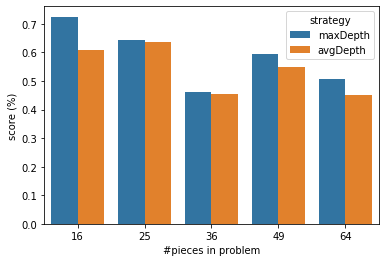

In [33]:
ax = sns.barplot(x='pieces', y='score', hue='strategy', data=df, ci=None)
ax.set(xlabel='#pieces in problem', ylabel='score (%)')
plt.savefig(images_dir + '/pieces_vs_score.png')
plt.show()

[(0, 0.9)]

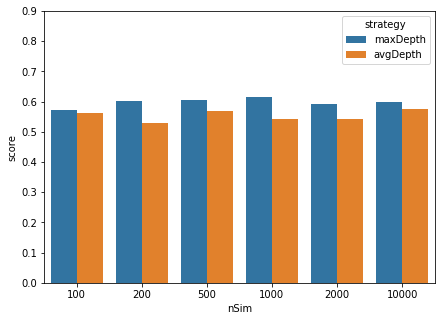

In [70]:
plt.figure(figsize=(7,5))
ax = sns.barplot(x='nSim', y='score', hue='strategy', data=df, ci=None)

ax.set(ylim=[0, 0.9])
plt.savefig(images_dir + '/max_vs_avg.png')

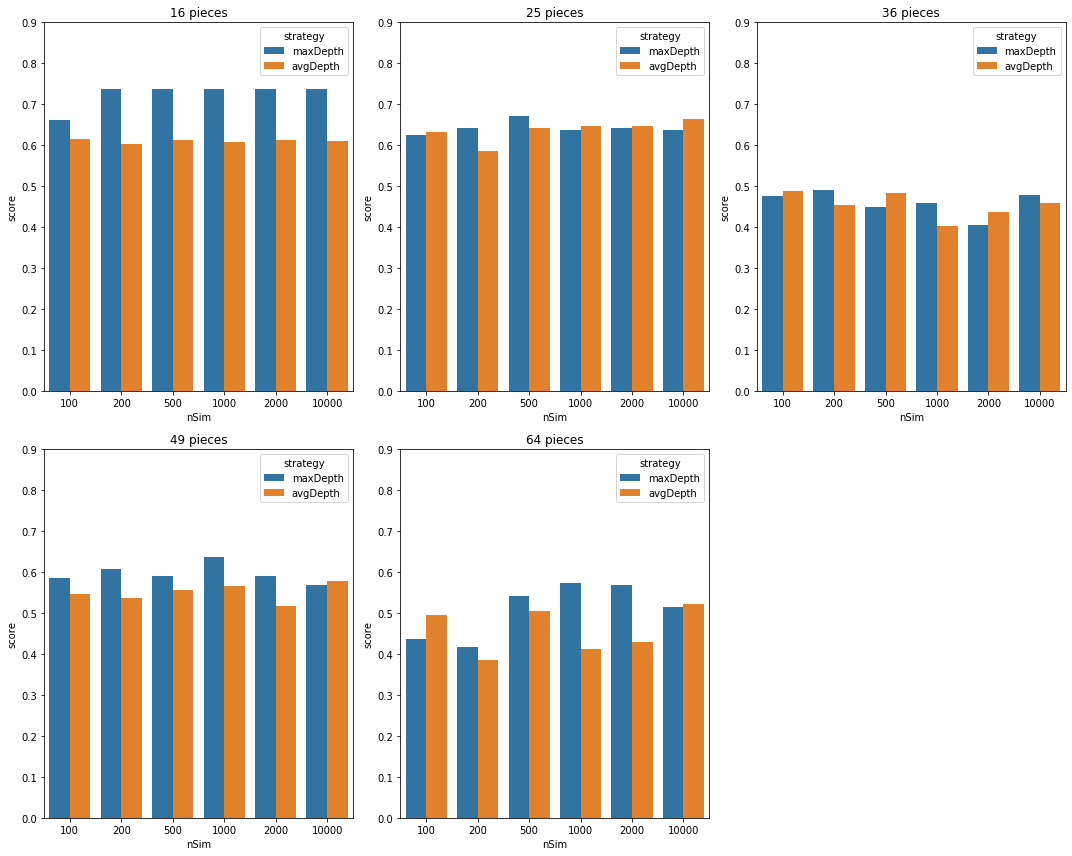

In [71]:
cols = 3
f, axes = plt.subplots(2, cols, figsize=(15, 12))
for i, pieces in enumerate(sorted(list(set(df['pieces'])))):
    _df = df[df['pieces'] == pieces]
    ax = sns.barplot(x='nSim', y='score', hue='strategy', data=_df, ci=None, ax=axes[i // cols][i %cols])
    ax.set_title(f"{pieces} pieces")
    ax.set(ylim=[0, 0.9])
f.delaxes(axes[1, 2])
f.tight_layout()
plt.savefig(images_dir + '/n_sim_per_different_problems.png')
plt.show()
    